In [1]:
import autograd.numpy as np
from autograd import grad
from autograd.numpy import log, sqrt, sin, cos, exp, pi, prod
from autograd.numpy.random import normal, uniform

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
import scipy.stats
from tqdm import tqdm

In [3]:
from tools import Helper, Sampler
from domain import Flower, Polygon, Heart, Cross, Star

In [4]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.random.seed(9)

In [5]:
def plot_domain(myDomainClass):
    points = myDomainClass.position(np.arange(0, 1, 0.001))
    fig = plt.figure(figsize=(3, 3))
    plt.plot(points[0, :], points[1, :])
    plt.legend(loc="upper left", prop={'size': 10})
    plt.tight_layout()
    plt.show()

In [6]:
def plot_MCMC_traj(myHelper, iters=1e5, lr=1e-4, boundary_=1.5):
    sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=lr, T=2)
    for iters in tqdm(range(int(iters))):
        sampler.rgld_step(iters)
        if iters % 50000 == 50000-1:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()

No handles with labels found to put in legend.


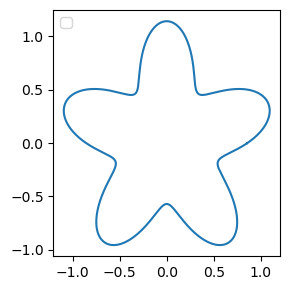

In [7]:
myFlower = Flower(petals=5, move_out=3)
plot_domain(myFlower)

In [8]:
myHelper = Helper(Flower, grid_radius=1e-2, grid_curve=1e-3)

In [9]:
plot_MCMC_traj(myHelper, iters=3e5, boundary_=1.5)

  0%|          | 1072/300000 [00:05<25:44, 193.55it/s]

KeyboardInterrupt



In [ ]:
myHeart = Heart()
plot_domain(myHeart)

In [ ]:
myHelper = Helper(Heart, grid_radius=1e-2, grid_curve=1e-3)

In [ ]:
plot_MCMC_traj(myHelper, iters=3e5, boundary_=2)

In [ ]:
myPolygon = Polygon(corners=8)
plot_domain(myPolygon)

In [ ]:
myHelper = Helper(Polygon)

In [ ]:
plot_MCMC_traj(myHelper, iters=3e5, lr=3e-4, boundary_=2)

In [ ]:
myStar = Star()
plot_domain(myStar)

In [ ]:
myHelper = Helper(Star, grid_radius=1e-2, grid_curve=1e-3)

In [ ]:
plot_MCMC_traj(myHelper, iters=3e5, lr=3e-4, boundary_=1.5)

In [ ]:
myCross = Cross()
plot_domain(myCross)

In [ ]:
myHelper = Helper(Cross, grid_radius=3e-3, grid_curve=3e-4)

In [ ]:
plot_MCMC_traj(myHelper, iters=3e5, lr=3e-4, boundary_=1.5)